Adapted from: https://www.kaggle.com/code/owenyoungrandolph/laptop-price-prediction/notebook

#0. Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor


#1. Dataset Description

This dataset is a collection of features related to various laptops, such as brand, processor type, RAM, storage capacity, and other specifications. The dataset also includes the corresponding prices of these laptops. This dataset can be used for regression analysis to predict the prices of laptops based on their features. The dataset is suitable for data scientists, machine learning enthusiasts, and researchers who are interested in building regression models to predict the prices of laptops based on various features.


In [2]:
file_path = '/content/laptopPrice.csv'
df = pd.read_csv(file_path)

### Dataset Information

In [3]:
df.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   brand              823 non-null    object
 1   processor_brand    823 non-null    object
 2   processor_name     823 non-null    object
 3   processor_gnrtn    823 non-null    object
 4   ram_gb             823 non-null    object
 5   ram_type           823 non-null    object
 6   ssd                823 non-null    object
 7   hdd                823 non-null    object
 8   os                 823 non-null    object
 9   os_bit             823 non-null    object
 10  graphic_card_gb    823 non-null    object
 11  weight             823 non-null    object
 12  warranty           823 non-null    object
 13  Touchscreen        823 non-null    object
 14  msoffice           823 non-null    object
 15  Price              823 non-null    int64 
 16  rating             823 non-null    object
 1

In [5]:
df.isnull().sum()

brand                0
processor_brand      0
processor_name       0
processor_gnrtn      0
ram_gb               0
ram_type             0
ssd                  0
hdd                  0
os                   0
os_bit               0
graphic_card_gb      0
weight               0
warranty             0
Touchscreen          0
msoffice             0
Price                0
rating               0
Number of Ratings    0
Number of Reviews    0
dtype: int64

In [6]:
df.describe()

,Price,Number of Ratings,Number of Reviews
count,823.000000,823.000000,823.000000
mean,76745.177400,315.301337,37.609964
std,45101.790525,1047.382654,121.728017
min,16990.000000,0.000000,0.000000
25%,46095.000000,0.000000,0.000000
50%,64990.000000,17.000000,2.000000
75%,89636.000000,139.500000,18.000000
max,441990.000000,15279.000000,1947.000000


In [7]:
#Add the exchange rate from Indian Rupees to USD
df['Price'] = df['Price']*0.012

#3. Dataset Visualizations

### Visualize the price distribution

Text(0, 0.5, 'Frequency')

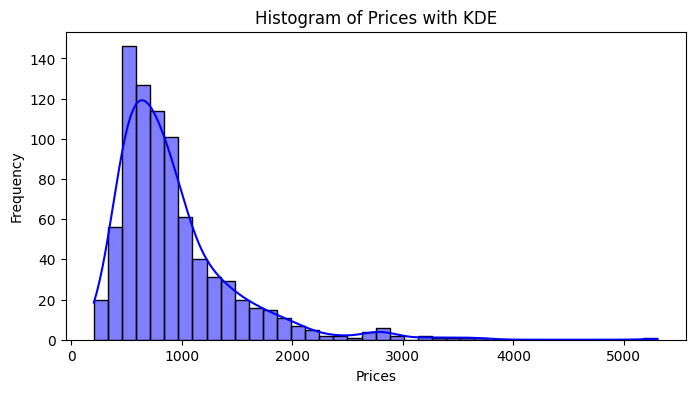

In [8]:
#Price Histogram
prices = df['Price']

# Create a histogram for the 'prices' variable
plt.figure(figsize=(8, 4))
sns.histplot(prices, bins=40, color='blue', kde=True)  # Using seaborn for histogram and KDE
plt.title('Histogram of Prices with KDE')
plt.xlabel('Prices')
plt.ylabel('Frequency')

### Price vs. Rating

Text(0, 0.5, 'Price')

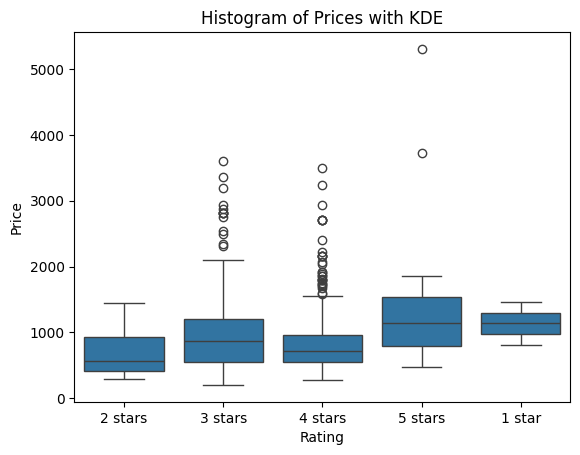

In [9]:
sns.boxplot(df,x="rating",y='Price' )  # Using seaborn for histogram and KDE
plt.title('Histogram of Prices with KDE')
plt.xlabel('Rating')
plt.ylabel('Price')

In [10]:
df.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,415.788,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,467.988,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,479.988,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,839.880,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,323.880,3 stars,0,0


<ipython-input-11-d51db457ce97>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='Price', y='processor_brand', inner='box', palette='Dark2')


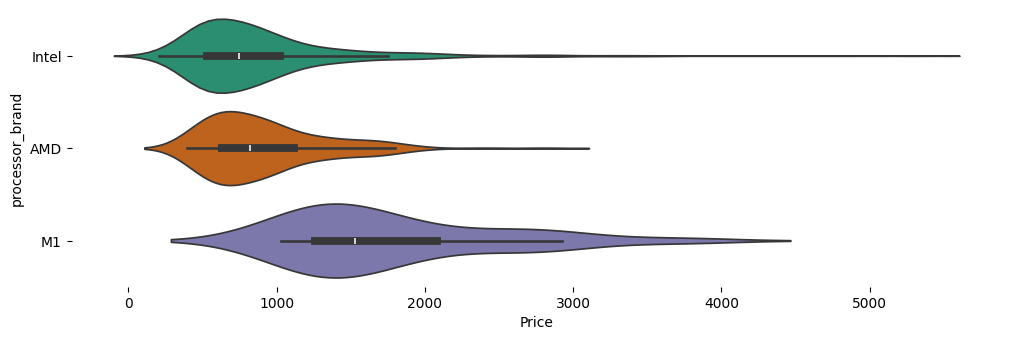

In [11]:
# @title processor_brand vs Price

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['processor_brand'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Price', y='processor_brand', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

#4. Preprocessing & Feature Engineering

In [12]:
categorical_variables = [feature for feature in df.columns if df[feature].dtype == 'object']

print(f'categorical variables: ', categorical_variables)

categorical variables:  ['brand', 'processor_brand', 'processor_name', 'processor_gnrtn', 'ram_gb', 'ram_type', 'ssd', 'hdd', 'os', 'os_bit', 'graphic_card_gb', 'weight', 'warranty', 'Touchscreen', 'msoffice', 'rating']


In [13]:
numerical_variables = [feature for feature in df.columns if df[feature].dtype != 'object']

print(f'numerical variables: ', numerical_variables)

numerical variables:  ['Price', 'Number of Ratings', 'Number of Reviews']


In [14]:
# removing the output variable, we dont need to scale it.
numerical_variables.remove("Price")

In [15]:
print(f'numerical variables: ', numerical_variables)

numerical variables:  ['Number of Ratings', 'Number of Reviews']


## Encoding categorical variables

In [16]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore',sparse_output=False)
enc.fit(df[categorical_variables])
print(enc.categories_)



[array(['APPLE', 'ASUS', 'Avita', 'DELL', 'HP', 'Lenovo', 'MSI', 'acer'],
      dtype=object), array(['AMD', 'Intel', 'M1'], dtype=object), array(['Celeron Dual', 'Core i3', 'Core i5', 'Core i7', 'Core i9', 'M1',
       'Pentium Quad', 'Ryzen 3', 'Ryzen 5', 'Ryzen 7', 'Ryzen 9'],
      dtype=object), array(['10th', '11th', '12th', '4th', '7th', '8th', '9th',
       'Not Available'], dtype=object), array(['16 GB', '32 GB', '4 GB', '8 GB'], dtype=object), array(['DDR3', 'DDR4', 'DDR5', 'LPDDR3', 'LPDDR4', 'LPDDR4X'],
      dtype=object), array(['0 GB', '1024 GB', '128 GB', '2048 GB', '256 GB', '3072 GB',
       '512 GB'], dtype=object), array(['0 GB', '1024 GB', '2048 GB', '512 GB'], dtype=object), array(['DOS', 'Mac', 'Windows'], dtype=object), array(['32-bit', '64-bit'], dtype=object), array(['0 GB', '2 GB', '4 GB', '6 GB', '8 GB'], dtype=object), array(['Casual', 'Gaming', 'ThinNlight'], dtype=object), array(['1 year', '2 years', '3 years', 'No warranty'], dtype=object), array(['No', 

In [17]:
encoded_categorical_inputs = enc.transform(df[categorical_variables])

In [18]:
encoded_categorical_inputs.shape

(823, 77)

## Scaling numerical variables

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df[numerical_variables])


StandardScaler()

In [20]:
numerical_variables

['Number of Ratings', 'Number of Reviews']

In [21]:

scaled_numerical_inputs = scaler.transform(df[numerical_variables])

In [22]:
scaled_numerical_inputs.shape

(823, 2)

In [23]:
# check if the means are around 0
scaled_numerical_inputs.mean(axis=0)

array([-1.72671382e-17, -1.72671382e-17])

In [24]:
# check if the stds are around 1
scaled_numerical_inputs.std(axis=0)

array([1., 1.])

### Alternatively,

In [25]:


#Perform one-hot encoding on categorical variables
#df_dummies = pd.get_dummies(df, columns=categorical_variables)
#df_dummies.head()

## Joining the inputs

In [26]:
X = np.column_stack((encoded_categorical_inputs,scaled_numerical_inputs))

In [27]:
# check the shape of the joined array
X.shape

(823, 79)

In [28]:
y = df['Price']
y.shape

(823,)

## Split the data set into training and test sets

In [29]:
# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



#5. Model Setup & Training

## Initial Lasso Model

In [35]:
# initialize the model
lasso = Lasso(alpha=0.1)

In [31]:
# train the model
lasso.fit(X_train, y_train)

y_pred = lasso.predict(X_test)

In [32]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"MSE: {mse}, RMSE: {rmse}")

MSE: 80105.00972379175, RMSE: 283.0282843176486


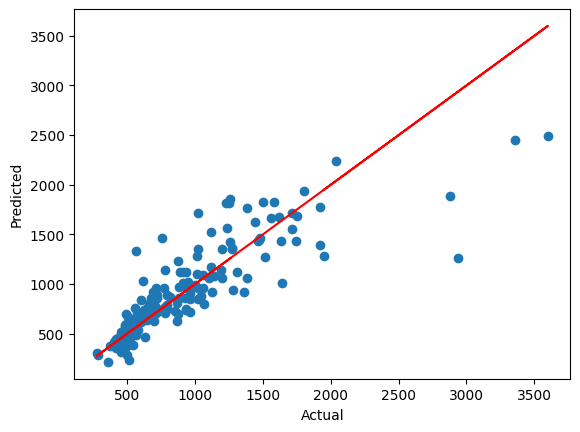

In [33]:
#Visualize MLR-trained model
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Plotting the identity line
plt.plot(y_test, y_test, color='red')
plt.show()

In [34]:
#Evaluation of MLR Model
print("R^2 on training data ",lasso.score(X_train, y_train))
print("R^2 on testing data ",lasso.score(X_test,y_test))

R^2 on training data  0.8384903441753697
R^2 on testing data  0.7145511031716135


## Optimal Alpha

In [39]:
from sklearn.model_selection import GridSearchCV

parameters = {'alpha':np.linspace(0,10,100)}
lasso_gs = Lasso()
gs = GridSearchCV(lasso_gs, parameters)
gs.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.221e+07, tolerance: 1.584e+04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.e

GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': array([ 0.        ,  0.1010101 ,  0.2020202 ,  0.3030303 ,  0.4040404 ,
        0.50505051,  0.60606061,  0.70707071,  0.80808081,  0.90909091,
        1.01010101,  1.11111111,  1.21212121,  1.31313131,  1.41414141,
        1.51515152,  1.61616162,  1.71717172,  1.81818182,  1.91919192,
        2.02020202,  2.12121212,  2.22222222,  2.32323232,  2.42424242,
        2.52525253,  2.62626263,  2.72727...
        6.56565657,  6.66666667,  6.76767677,  6.86868687,  6.96969697,
        7.07070707,  7.17171717,  7.27272727,  7.37373737,  7.47474747,
        7.57575758,  7.67676768,  7.77777778,  7.87878788,  7.97979798,
        8.08080808,  8.18181818,  8.28282828,  8.38383838,  8.48484848,
        8.58585859,  8.68686869,  8.78787879,  8.88888889,  8.98989899,
        9.09090909,  9.19191919,  9.29292929,  9.39393939,  9.49494949,
        9.5959596 ,  9.6969697 ,  9.7979798 ,  9.8989899 , 10.        ])})

In [40]:
gs.best_params_

{'alpha': 1.5151515151515151}

In [41]:
lasso_optimal = Lasso(alpha=gs.best_params_['alpha'])

lasso_optimal.fit(X_train, y_train)

Lasso(alpha=1.5151515151515151)

In [44]:
y_pred = lasso_optimal.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"MSE: {mse}, RMSE: {rmse}")
#Evaluation of MLR Model
print("R^2 on training data ",lasso_optimal.score(X_train, y_train))
print("R^2 on testing data ",lasso_optimal.score(X_test,y_test))



MSE: 83031.19284864965, RMSE: 288.15133671154405
R^2 on training data  0.8134337179225811
R^2 on testing data  0.7041238434061055


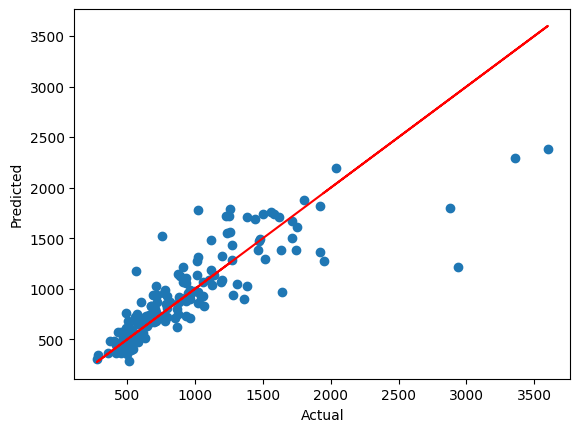

In [45]:
#Visualize MLR-trained model
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Plotting the identity line
plt.plot(y_test, y_test, color='red')
plt.show()


## Visualize the coefficients

<BarContainer object of 79 artists>

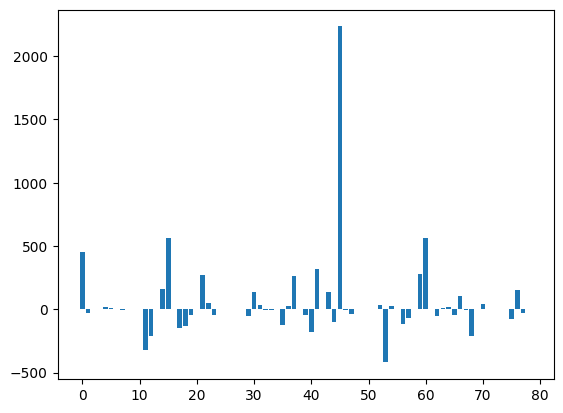

In [48]:
plt.bar(range(len(lasso_optimal.coef_)),lasso_optimal.coef_)

<a id="1"></a>
<div style="background-color: black; color: white; padding: 20px; font-size: 24px;">
    Other Linear Regression Models
</div>

In [49]:
# Initialize Ridge Regression model
ridge_model = Ridge(random_state=42)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
r2_ridge = ridge_model.score(X_test, y_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)


# Initialize Decision Tree Regressor model
decision_tree_model = DecisionTreeRegressor(random_state=42)
decision_tree_model.fit(X_train, y_train)
y_pred_decision_tree = decision_tree_model.predict(X_test)
r2_decision_tree = decision_tree_model.score(X_test, y_test)
mse_decision_tree = mean_squared_error(y_test, y_pred_decision_tree)
rmse_decision_tree = np.sqrt(mse_decision_tree)

# Initialize Gradient Boosting Regressor model
gradient_boosting_model = GradientBoostingRegressor(random_state=42)
gradient_boosting_model.fit(X_train, y_train)
y_pred_gradient_boosting = gradient_boosting_model.predict(X_test)
r2_gradient_boosting = gradient_boosting_model.score(X_test, y_test)
mse_gradient_boosting = mean_squared_error(y_test, y_pred_gradient_boosting)
rmse_gradient_boosting = np.sqrt(mse_gradient_boosting)

# Initialize XGBoost Regressor model
xgboost_model = XGBRegressor(random_state=42)
xgboost_model.fit(X_train, y_train)
y_pred_xgboost = xgboost_model.predict(X_test)
r2_xgboost = xgboost_model.score(X_test, y_test)
mse_xgboost = mean_squared_error(y_test, y_pred_xgboost)
rmse_xgboost = np.sqrt(mse_xgboost)

In [50]:
model_names = ['Ridge', 'Decision Tree', 'Gradient Boosting', 'XGBoost']

# List of models and their corresponding metrics
models = [
    {'R-squared': r2_ridge, 'MSE': mse_ridge, 'RMSE': rmse_ridge},
    {'R-squared': r2_decision_tree, 'MSE': mse_decision_tree, 'RMSE': rmse_decision_tree},
    {'R-squared': r2_gradient_boosting, 'MSE': mse_gradient_boosting, 'RMSE': rmse_gradient_boosting},
    {'R-squared': r2_xgboost, 'MSE': mse_xgboost, 'RMSE': rmse_xgboost},
]

# Create a DataFrame
df_metrics = pd.DataFrame(models, index=model_names)

df_metrics

,R-squared,MSE,RMSE
Ridge,0.712494,80682.424955,284.046519
Decision Tree,0.452848,153546.362403,391.849923
Gradient Boosting,0.688828,87323.763682,295.505945
XGBoost,0.674481,91349.846313,302.241371
